In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [3]:
df = pd.read_csv("WELLCOME_APCspend2013_forThinkful.csv", engine='python')

In [4]:
df.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [4]:
df.dtypes

PMID/PMCID                                             object
Publisher                                              object
Journal title                                          object
Article title                                          object
COST (£) charged to Wellcome (inc VAT when charged)    object
dtype: object

In [5]:
#rename columns for easy reference
df.columns = ['id', 'publisher', 'journal', 'article', 'cost']

In [6]:
df.shape

(2127, 5)

In [6]:
#remove £,$ from cost
df['cost'] = df['cost'].str.replace('£', '')
df['cost'] = df['cost'].str.replace('$', '')

In [7]:
#convert cost to numeric
df['cost'] = pd.to_numeric(df['cost'])

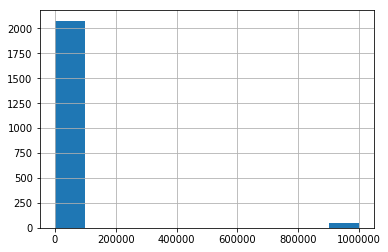

In [40]:
df.cost.hist()

In [8]:
#Replace outlier cost data with None
df.loc[df.cost > 10000, 'cost'] = None

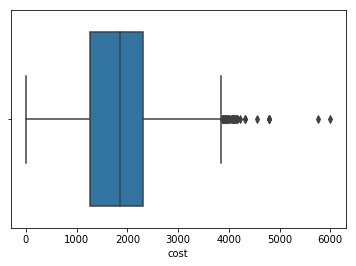

In [42]:
sns.boxplot('cost', data=df)

In [9]:
#make all journal names lowercase
df['journal'] = df['journal'].str.lower()
df['journal'] = df['journal'].str.replace('the', '')
# strip whitespace, remove double spaces
df['journal'] = df['journal'].str.strip().str.replace('  ', ' ')

In [18]:
#replace variations
df['journal'] = df['journal'].str.replace('plosone', 'plos one')
df['journal'] = df['journal'].str.replace('j med chem', 'journal of medicinal chemistry')
df['journal'] = df['journal'].str.replace('antimicrobial agfents and chemorapy', 'antimicrobial agents and chemorapy')
df['journal'] = df['journal'].str.replace('j biol chemistry', 'journal of biological chemistry')
df['journal'] = df['journal'].str.replace('j biol chem.', 'journal of biological chemistry')
df['journal'] = df['journal'].str.replace('biologicial chemistry', 'journal of biological chemistry')
df['journal'] = df['journal'].str.replace('jnl journal of biological chemistry', 'journal of biological chemistry')
df['journal'] = df['journal'].str.replace('journal journal of biological chemistry', 'journal of biological chemistry')
df['journal'] = df['journal'].str.replace('journal of biol chem', 'journal of biological chemistry')
df['journal'] = df['journal'].str.replace('journal biological chemistry', 'journal of biological chemistry')
df['journal'] = df['journal'].str.replace('jnl biological chemistry', 'journal of biological chemistry')
df['journal'] = df['journal'].str.replace('biochem journal', 'biochemical journal')

In [25]:
df['journal'].unique()

array(['psychological medicine', 'biomacromolecules',
       'journal of medicinal chemistry', 'j org chem',
       'journal of proteome research', 'mol pharm', 'acs chemical biology',
       'journal of chemical information and modeling', 'biochemistry',
       'gastroenterology', 'journal of biological chemistry',
       'journal of immunology', 'acs chemical neuroscience', 'acs nano',
       'american chemical society', 'analytical chemistry',
       'bioconjugate chemistry', 'journal of american chemical society',
       'chest', 'journal of neurophysiology', 'journal of physiology',
       'american journal of psychiatry', 'americal journal of psychiatry',
       'behavioral neuroscience', 'emotion', 'health psychology',
       'journal of abnormal psychology',
       'journal of consulting and clinical psychology',
       'journal of experimental psychology: animal behaviour process',
       'journal of experimental psychology: human perception and performance',
       'journal o

In [20]:
df['journal'].value_counts()

plos one                                                                                 200
journal of biological chemistry                                                           72
neuroimage                                                                                29
nucleic acids research                                                                    26
plos pathogens                                                                            24
plos genetics                                                                             24
proceedings of national academy of sciences                                               22
plos neglected tropical diseases                                                          20
human molecular genetics                                                                  19
nature communications                                                                     19
biochemical journal                                                   

In [21]:
#top 5 most common journals
df['journal'].value_counts()[:5]

plos one                           200
journal of biological chemistry     72
neuroimage                          29
nucleic acids research              26
plos pathogens                      24
Name: journal, dtype: int64

In [22]:
top_5 = df['journal'].value_counts().index[:5].tolist()

In [23]:
# mean, median, sd for top 5 journals
for j in top_5:
    print(j)
    print('Mean: ', df[df['journal'] == j]['cost'].mean())
    print('Median: ',df[df['journal'] == j]['cost'].median())
    print('Standard Deviation: ',df[df['journal'] == j]['cost'].std())
    print('\n')

plos one
Mean:  931.4815183246061
Median:  893.43
Standard Deviation:  197.5782539794733


journal of biological chemistry
Mean:  1384.3060000000003
Median:  1313.13
Standard Deviation:  387.845379397512


neuroimage
Mean:  2215.168275862069
Median:  2326.43
Standard Deviation:  266.65394691928987


nucleic acids research
Mean:  1149.0
Median:  852.0
Standard Deviation:  442.9404474644419


plos pathogens
Mean:  1572.8668181818182
Median:  1600.25
Standard Deviation:  161.78089066583865




In [16]:
df = df[~df['journal'].isnull()]

In [24]:
import re
df['journal'].apply(lambda x: re.findall('neuroimage', x))

0       []
1       []
2       []
3       []
4       []
5       []
6       []
7       []
8       []
9       []
10      []
11      []
12      []
13      []
14      []
15      []
16      []
17      []
18      []
19      []
20      []
21      []
22      []
23      []
24      []
25      []
26      []
27      []
28      []
29      []
        ..
2097    []
2098    []
2099    []
2100    []
2101    []
2102    []
2103    []
2104    []
2105    []
2106    []
2107    []
2108    []
2109    []
2110    []
2111    []
2112    []
2113    []
2114    []
2115    []
2116    []
2117    []
2118    []
2119    []
2120    []
2121    []
2122    []
2123    []
2124    []
2125    []
2126    []
Name: journal, Length: 2126, dtype: object

In [32]:
df.loc[df['journal'].str.contains('neuroimage'), 'journal']

437              neuroimage
438              neuroimage
689              neuroimage
690              neuroimage
691              neuroimage
692              neuroimage
693              neuroimage
694              neuroimage
695              neuroimage
696              neuroimage
697              neuroimage
698              neuroimage
699              neuroimage
700              neuroimage
701              neuroimage
702              neuroimage
703              neuroimage
704              neuroimage
705              neuroimage
706              neuroimage
707              neuroimage
708              neuroimage
709              neuroimage
710              neuroimage
711              neuroimage
712              neuroimage
713              neuroimage
714              neuroimage
715              neuroimage
716    neuroimage: clinical
717    neuroimage: clinical
718    neuroimage: clinical
719    neuroimage: clinical
720    neuroimage: clinical
Name: journal, dtype: object

In [33]:
def find_subject(journal):
    if 'neuro' in journal:
        return 'neuroscience'
    elif 'bio' in journal:
        return 'biology'
    elif 'chem' in journal:
        return 'chemistry'
    elif 'gene' in journal:
        return 'genetics'
    elif 'health' in journal:
        return 'health'
    else:
        return 'other'

In [35]:
df['subject'] = df['journal'].apply(find_subject)

In [41]:
subjects = df.groupby(df['subject'])

In [42]:
subjects['cost'].mean()

subject
biology         1770.821752
chemistry       1676.740213
genetics        2005.594537
health          1626.555789
neuroscience    2054.688368
other           1800.041602
Name: cost, dtype: float64